###  Import the neccesary libraries

In [21]:
# Data Manipulation and Visualisation libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

# Modeling libraries 
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn import metrics

# Model for saving the model
import joblib

### Data Obtainance, Preprocess and Explore


### data Obtainance

In [22]:
# load data
iris_data = load_iris(as_frame=True)['frame'] 
# Loads entire dataset including both the feature data and the target data.

iris_unsupervised=load_iris(as_frame=True)['data']
# Loads only the featured data suitable for unsupervised learning.

#view the data
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [23]:
iris_unsupervised.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [24]:
# check info
iris_unsupervised.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [25]:
iris_unsupervised.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


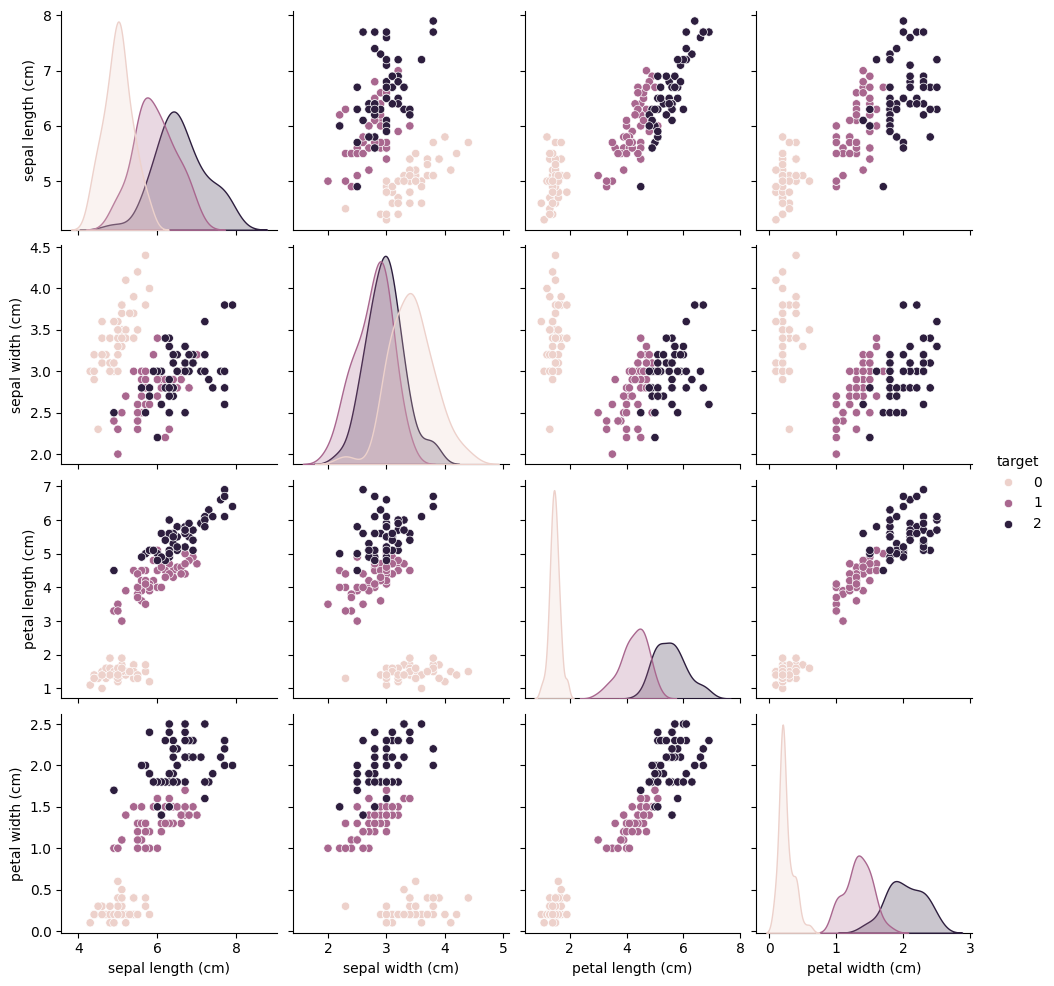

In [26]:
# Explore
sns.pairplot(iris_data, hue='target')

## Modelling

In [27]:
# Split data using sklearn.train_test_split
x=iris_data.drop('target', axis=1)
y=iris_data['target']
x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.7, random_state=42)

In [28]:
# Checking the number of sample rows and columns of x-test
x_test.shape

(45, 4)

In [29]:
import numpy as np
test_array=np.array([[1, 2, 3, 4], [1, 2, 3, 4]])
test_array.shape

(2, 4)

In [30]:
# Instantiate the classification models
svc= SVC()
decision_tree=DecisionTreeClassifier()
random_forest=RandomForestClassifier()
models=[svc, decision_tree, random_forest]

In [31]:
iris_data['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

### KMeans

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\clus

Text(0.5, 1.0, 'Elbow method')

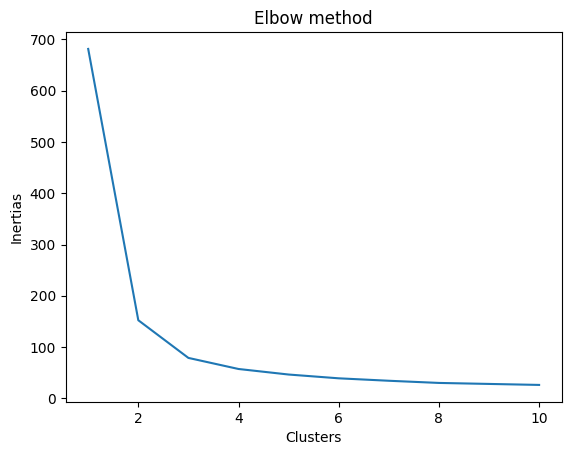

In [32]:
# Get optimum cluster by using KMeans and plotting the graph.
inertias=[]
clusters=list(range(1,11))
for cluster in clusters:
    kmeans=KMeans(n_clusters=cluster)
    kmeans.fit(iris_unsupervised)
    inertias.append(kmeans.inertia_)
plt.plot(clusters, inertias)
plt.xlabel("Clusters")
plt.ylabel("Inertias")
plt.title('Elbow method')

In [33]:
# Instantiate the model
kmeans=KMeans(n_clusters=3)
#Fit and predict
labels=kmeans.fit_predict(iris_unsupervised)

'''
Evaluate the algorithm
High silhouette score(close to 1) implies dense, well-separated clusters 
with good clustering structure implies the inverse'''
metrics.silhouette_score(iris_unsupervised, labels)

c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


0.5528190123564102

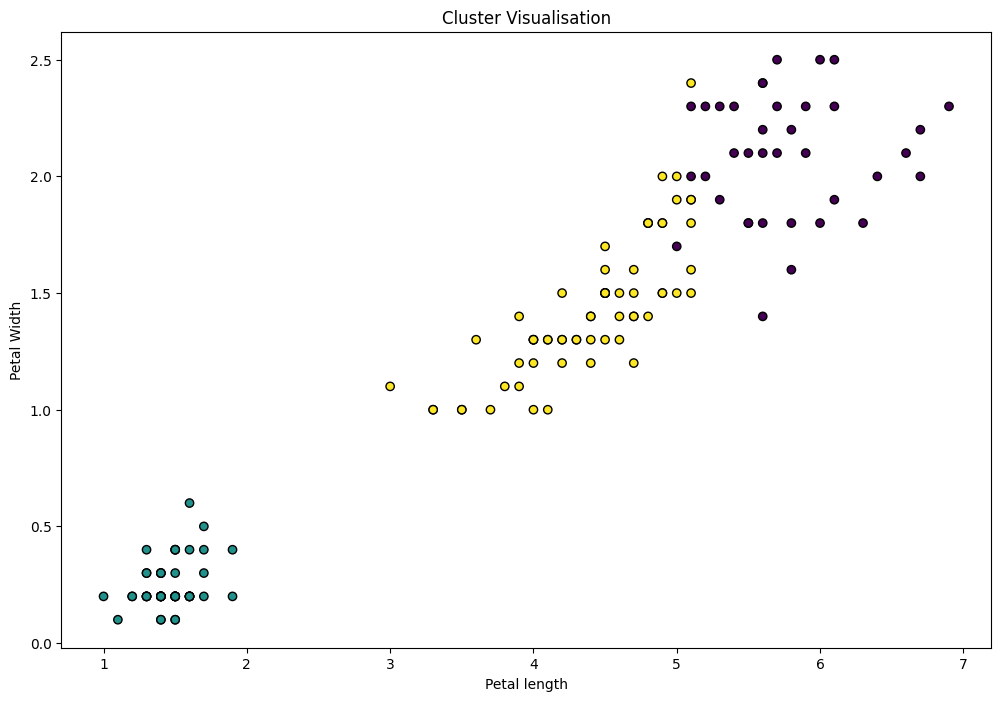

In [34]:
# plot the clusters using matplotlib
plt.figure(figsize=(12,8))# defining size of the figure.
plt.scatter(iris_unsupervised['petal length (cm)'],
            iris_unsupervised['petal width (cm)'],
             c = labels, edgecolors="k")
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.title("Cluster Visualisation")
plt.show()

### Hierarchical Clustering

Text(0.5, 1.0, 'Hierachical Clustering')

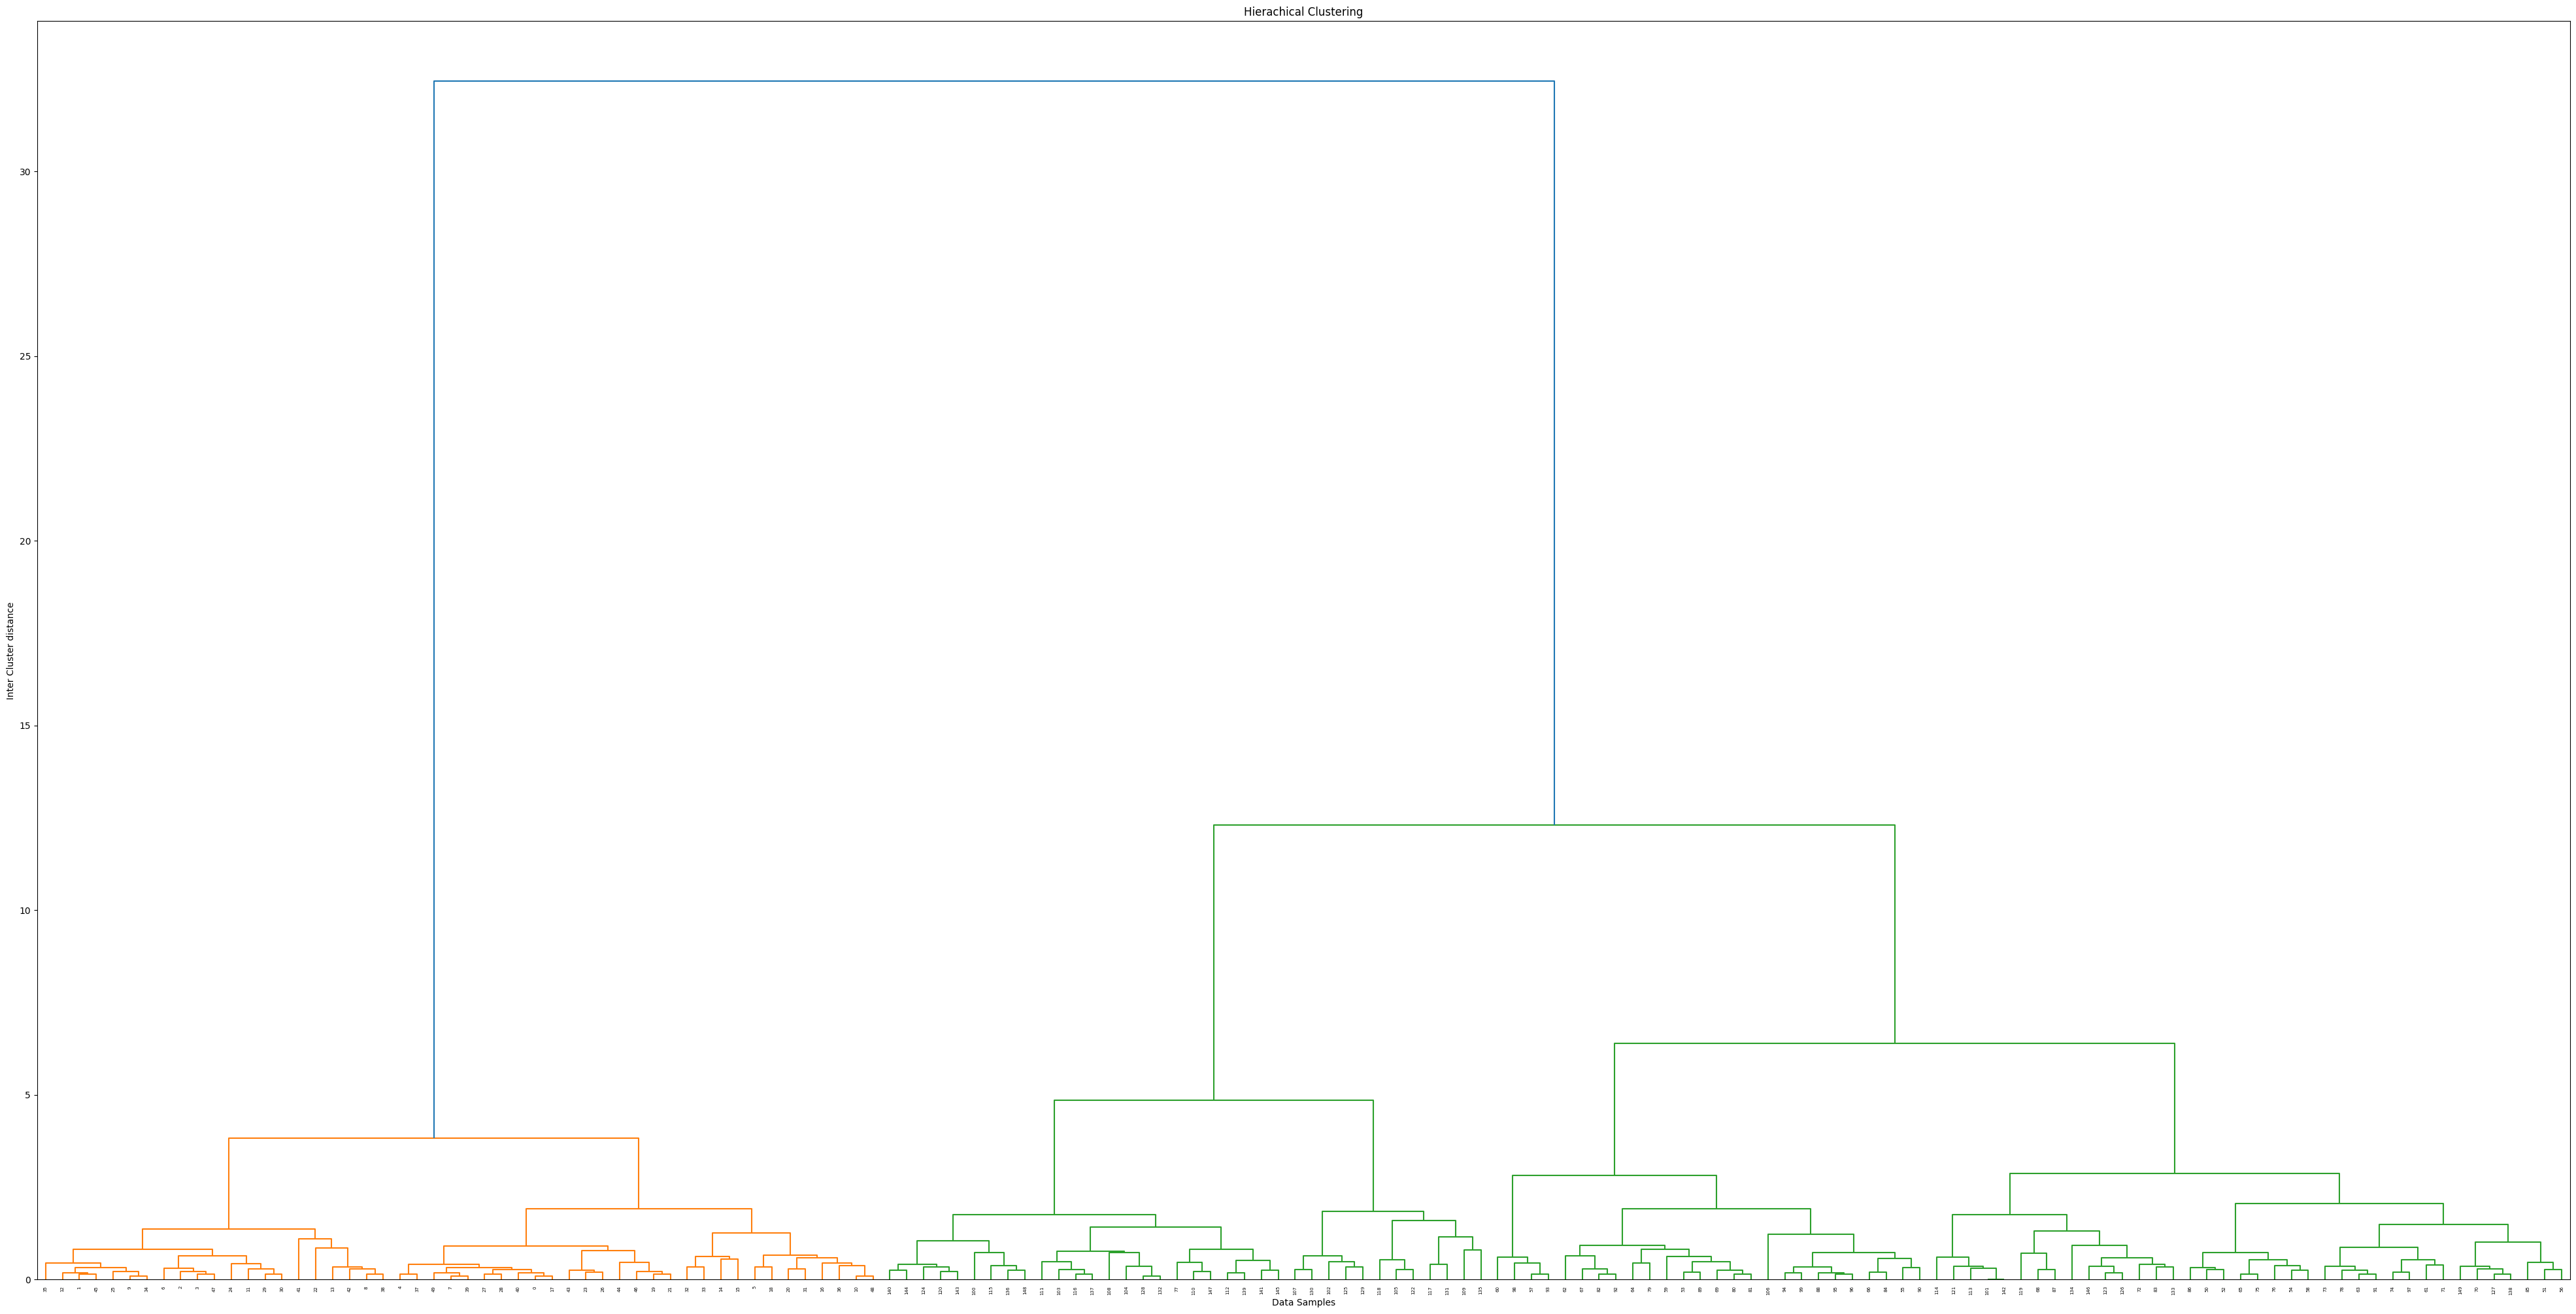

In [35]:
# create a cluster matrix
linkage_matrix=linkage(iris_unsupervised, method='ward', metric='euclidean')

# plot dendrogan
plt.figure(figsize=(50,25))
dendrogram(linkage_matrix)
plt.xlabel("Data Samples")
plt.ylabel("Inter Cluster distance")
plt.title("Hierachical Clustering")



In [36]:
# Obtain the labels
labels_hierarchical=fcluster(linkage_matrix, 3,criterion='maxclust')

In [37]:
metrics.silhouette_score(iris_unsupervised, labels_hierarchical)
#metrics.accuracy_score(iris_unsupervised, labels_hierarchical)

0.5543236611296426

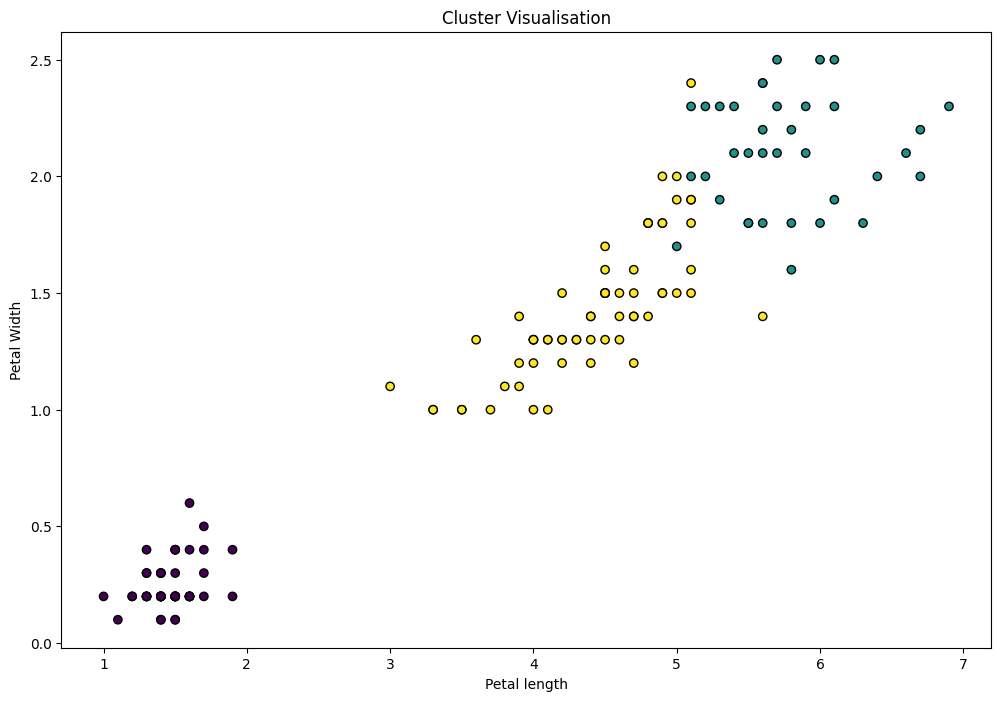

In [38]:
# plot the clusters
plt.figure(figsize=(12,8))
plt.scatter(iris_unsupervised['petal length (cm)'],
            iris_unsupervised['petal width (cm)'],
             c = labels_hierarchical, edgecolors="k")
plt.xlabel("Petal length")
plt.ylabel("Petal Width")
plt.title("Cluster Visualisation")
plt.show()

In [39]:
#Train
for model in models:
    model.fit(x_train, y_train)
    predictions=model.predict(x_test)
    accuracy=metrics.accuracy_score(y_test, predictions)
    print(f'This {model} has accuracy of {accuracy}')

This SVC() has accuracy of 1.0
This DecisionTreeClassifier() has accuracy of 1.0
This RandomForestClassifier() has accuracy of 1.0


In [40]:
# Save the models
joblib.dump(random_forest, 'random_forest_model.pkl')
joblib.dump(svc, 'svc_model.pk1')
joblib.dump(decision_tree, "decision_tree_classifier.joblib")

['decision_tree_classifier.joblib']